# Datset de Salarios de lo Futbolistas
El dataset tiene esatas siguientes variables la edad, y su salario, el club, la liga, Nacion, la posicion.

X=Edad

Y=Salario

In [ ]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np

import pandas as pd

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Leer datos separados por una coma
# data = np.loadtxt('ex1data1.txt', delimiter=',')
# data = np.loadtxt(os.path.join('data', 'ex1data1.txt'), delimiter=',')
data = pd.read_csv('/content/drive/MyDrive/Datasets/SalaryPrediction.csv')
X, y = data.iloc[:, 1], data.iloc[:, 0]
y = y.str.replace(',', '', regex=False)
y = y.astype(float)

m = y.size  # m = numero de ejemplos de entrenamiento

In [ ]:
print(data)

            Wage  Age       Club             League Nation    Position  Apps  \
0     46,427,000   23        PSG  Ligue 1 Uber Eats    FRA     Forward   190   
1     42,125,000   30        PSG  Ligue 1 Uber Eats    BRA   Midfilder   324   
2     34,821,000   35        PSG  Ligue 1 Uber Eats    ARG     Forward   585   
3     19,959,000   31  R. Madrid            La Liga    BEL     Forward   443   
4     19,500,000   31    Man UFC     Premier League    ESP  Goalkeeper   480   
...          ...  ...        ...                ...    ...         ...   ...   
3902       3,400   19       Vigo            La Liga    ESP    Defender     0   
3903       3,200   18  Famalicao      Primiera Liga    BRA  Goalkeeper     0   
3904       2,900   18       Vigo            La Liga    ESP     Forward     0   
3905       2,700   18       Vigo            La Liga    ESP    Defender     0   
3906       1,400   18       Vigo            La Liga    ESP    Defender     0   

      Caps  
0       57  
1      119  


In [ ]:
print(X)
print(m)

0       23
1       30
2       35
3       31
4       31
        ..
3902    19
3903    18
3904    18
3905    18
3906    18
Name: Age, Length: 3907, dtype: int64
3907


In [ ]:
print(y)

0       46427000.0
1       42125000.0
2       34821000.0
3       19959000.0
4       19500000.0
           ...    
3902        3400.0
3903        3200.0
3904        2900.0
3905        2700.0
3906        1400.0
Name: Wage, Length: 3907, dtype: float64


In [ ]:
print(X.size)

3907


In [ ]:
def plotData(x, y):
    #Grafica los puntos x e y en una figura nueva.

    fig = pyplot.figure()  # abre una nueva figura

    pyplot.plot(x, y, 'ro', ms=10, mec='k')
    pyplot.ylabel('Salario en $')
    pyplot.xlabel('Edades de Futbolistas')


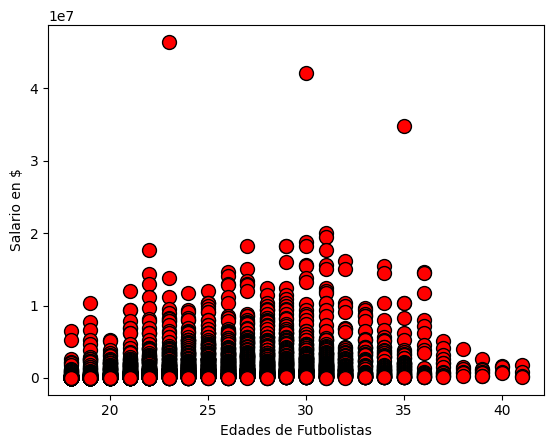

In [ ]:
plotData(X, y)

In [ ]:
# Agrega una columna de unos a X. La funcion stack de numpy une matrices a lo largo de un eje dado.
# El primer eje (eje = 0) se refiere a filas (ejemplos de entrenamiento)
# y el segundo eje (eje = 1) se refiere a columnas (características).

X = np.stack([np.ones(m), X], axis=1)

In [ ]:
print(X)

[[ 1. 23.]
 [ 1. 30.]
 [ 1. 35.]
 ...
 [ 1. 18.]
 [ 1. 18.]
 [ 1. 18.]]


In [ ]:
print(y.dtype)
print(X.dtype)

float64
float64


In [ ]:
def calcularCosto(X, y, theta):
    # inicializa algunos valores importantes
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    # h = np.dot(X, theta)
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
    return J

In [ ]:
def gradientDescent(X, y, theta, alpha, num_iters):
        # Inicializa algunos valores importantes
    m = y.shape[0]  # numero de ejemplos de entrenamiento

    # hace una copia de theta, para evitar cambiar la matriz original,
    # ya que las matrices numpy se pasan por referencia a las funciones

    theta = theta.copy()

    J_history = [] # Lista que se utiliza para almacenar el costo en cada iteración

    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        # save the cost J in every iteration
        J_history.append(calcularCosto(X, y, theta))

    return theta, J_history

In [ ]:
# inicializa los parametros de ajuste
theta = np.zeros(2)

# configuraciones para el descenso por el gradiente
iterations = 5000
alpha = 0.001

theta, J_history = gradientDescent(X ,y, theta, alpha, iterations)
print('Theta encontrada por descenso gradiente: {:.4f}, {:.4f}'.format(*theta))
print('Valores theta esperados (aproximadamente): [-3.6303, 1.1664]')
print(J_history)

Theta encontrada por descenso gradiente: -480057.6806, 80228.6028
Valores theta esperados (aproximadamente): [-3.6303, 1.1664]
[np.float64(3330893318115.4497), np.float64(3183072592461.298), np.float64(3160245613422.569), np.float64(3156712473495.4834), np.float64(3156157501030.2217), np.float64(3156062234585.5527), np.float64(3156037928410.276), np.float64(3156024576320.96), np.float64(3156012915857.349), np.float64(3156001517280.568), np.float64(3155990159898.309), np.float64(3155978809644.7944), np.float64(3155967461261.6196), np.float64(3155956113937.045), np.float64(3155944767545.7104), np.float64(3155933422068.203), np.float64(3155922077501.466), np.float64(3155910733844.9624), np.float64(3155899391098.551), np.float64(3155888049262.1465), np.float64(3155876708335.675), np.float64(3155865368319.062), np.float64(3155854029212.236), np.float64(3155842691015.1226), np.float64(3155831353727.649), np.float64(3155820017349.7437), np.float64(3155808681881.3325), np.float64(3155797347322

In [ ]:
# Predecir valores de beneficio para poblaciones de 35,000 y 70,000
predict1 = np.dot([1, 29], theta)
print('Para una edad de 29, se predice un salario de {:.2f}\n'.format(predict1))

predict2 = np.dot([1, 23], theta)
print('Para una edad de 23, se predice un salario de {:.2f}\n'.format(predict2))

Para una edad de 29, se predice un salario de 1846571.80

Para una edad de 23, se predice un salario de 1365200.18



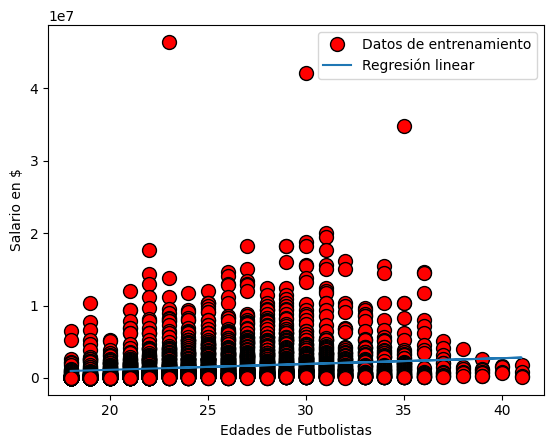

In [ ]:
# grafica la linea de ajuste
plotData(X[:, 1], y)
pyplot.plot(X[:, 1], np.dot(X, theta), '-')
pyplot.legend(['Datos de entrenamiento', 'Regresión linear']);

Text(0, 0.5, 'Costo J')

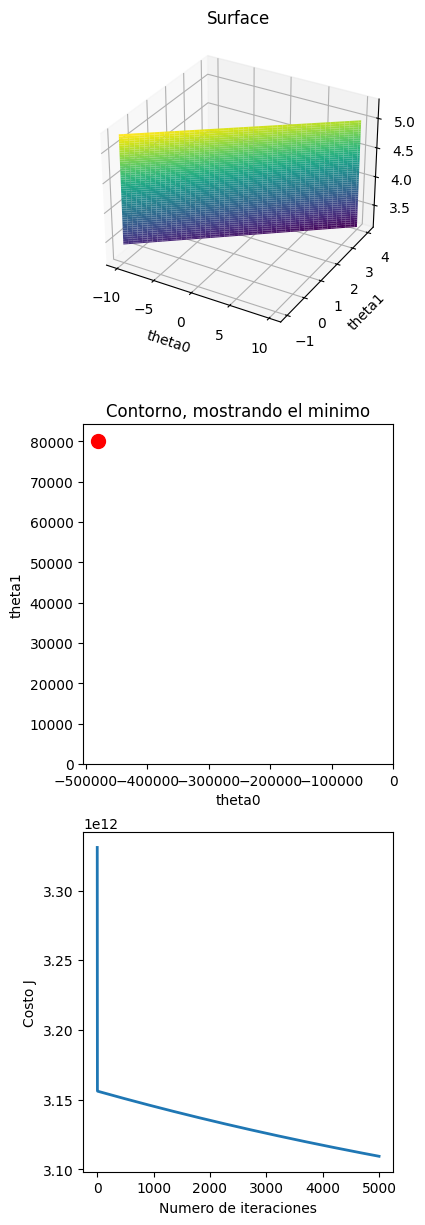

In [ ]:
# cuadrícula sobre la que se calcula J
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

# inicializa J_vals con una matriz de 0's
J_vals = np.zeros((theta0_vals.shape[0], theta1_vals.shape[0]))

# Completar J_vals
for i, theta0 in enumerate(theta0_vals):
    for j, theta1 in enumerate(theta1_vals):
        J_vals[i, j] = calcularCosto(X, y, [theta0, theta1])

# Debido a la forma en que funcionan las cuadrículas en el comando surf,
# se necesita transponer J_vals antes de llamar a surf, o de lo contrario los ejes se invertirán
J_vals = J_vals.T

# graficar la superficie
fig = pyplot.figure(figsize=(4, 15))
ax = fig.add_subplot(311, projection='3d')
ax.plot_surface(theta0_vals, theta1_vals, J_vals, cmap='viridis')
pyplot.xlabel('theta0')
pyplot.ylabel('theta1')
pyplot.title('Surface')

# graficar contornos
# Grafica J_vals como 15 contours spaciados logaritmicamente entre 0.01 y 100
ax = pyplot.subplot(312)
pyplot.contour(theta0_vals, theta1_vals, J_vals, linewidths=2, cmap='viridis', levels=np.logspace(-2, 3, 20))
pyplot.xlabel('theta0')
pyplot.ylabel('theta1')
pyplot.plot(theta[0], theta[1], 'ro', ms=10, lw=2)
pyplot.title('Contorno, mostrando el minimo')


# Grafica la convergencia del costo
ax = pyplot.subplot(313)
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')